# Machine Learning applied to Astroinformatics

# Load libraries

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Load data

In [2]:
# import data

# Train data
raw_df = pd.read_csv("plasticc_dataset/training_set.csv")
# display data
display(raw_df.head())

# metadata
metadata_df = pd.read_csv("plasticc_dataset/training_set_metadata.csv")
# display data
display(metadata_df.head())

# merge data
df = raw_df.merge(metadata_df, on = "object_id")
# display data
display(df.head())

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1


,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


In [3]:
# check dataset size
print("Shape of data to work: ", df.shape)

# check amount of different astronomycal objects
print("Unique targets: ", df.target.unique().shape[0])
print("targets: ", df.target.unique())

Shape of data to work:  (1421705, 17)
Unique targets:  14
targets:  [92 88 42 90 65 16 67 95 62 15 52  6 64 53]


### Ploting a light curve

,object_id,mjd,passband,flux,flux_err,detected,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,59750.4229,2,-544.810303,3.622952,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
1,615,59750.4306,1,-816.434326,5.553370,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
2,615,59750.4383,3,-471.385529,3.801213,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
3,615,59750.4450,4,-388.984985,11.395031,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
4,615,59752.4070,2,-681.858887,4.041204,1,349.046051,-61.943836,320.79653,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92


<IPython.core.display.Javascript object>


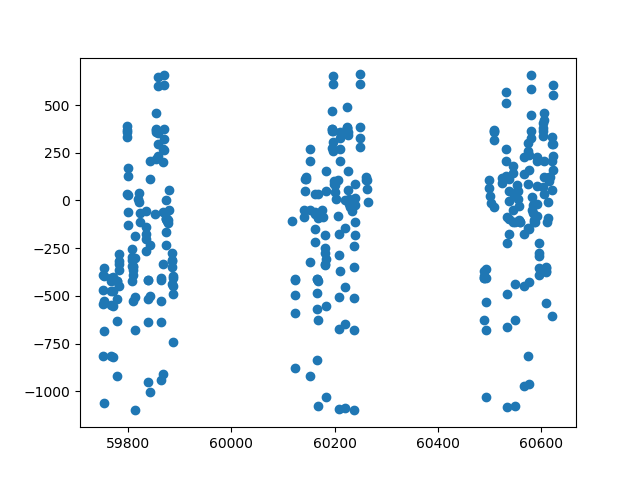

In [4]:
# get one light curve
one_ligth_curve = df[df["object_id"] == 615]

# display the light curve data
display(one_ligth_curve.head())

#plot light curve
fix, ax = plt.subplots()
ax.scatter(one_ligth_curve["mjd"], one_ligth_curve["flux"])

# Select variables with which we will work

In [5]:
# getting only useful features
light_curves = df[["object_id", "mjd", "passband", "flux", "flux_err", "target"]]

# display dataset
display(light_curves.head())

# light curve data frame shape
display(light_curves.shape)

,object_id,mjd,passband,flux,flux_err,target
0,615,59750.4229,2,-544.810303,3.622952,92
1,615,59750.4306,1,-816.434326,5.553370,92
2,615,59750.4383,3,-471.385529,3.801213,92
3,615,59750.4450,4,-388.984985,11.395031,92
4,615,59752.4070,2,-681.858887,4.041204,92


(1421705, 6)

# Feature extraction

### Select features

In [9]:
# get all object_ids
object_ids = light_curves["object_id"].unique()

# print user message
print("objects di: ", object_ids.shape)

# set passband to analyze
passband = 0

# define features to work with them
# you can get from the documentation
features_names = ['Amplitude',
                  'AndersonDarling', 
#                   'Autocor_length', 
#                   'Beyond1Std', 
#                   'CAR_mean',
#                   'CAR_sigma', 
#                   'CAR_tau', 
#                   'Con', 
#                   'Eta_e', 
#                   'FluxPercentileRatioMid20',
#                  'FluxPercentileRatioMid35', 
#                   'FluxPercentileRatioMid50',
#                  'FluxPercentileRatioMid65' ,
#                   'FluxPercentileRatioMid80',
#                  'Freq1_harmonics_amplitude_0' ,
#                   'Freq1_harmonics_amplitude_1',
#                  'Freq1_harmonics_amplitude_2' ,
#                   'Freq1_harmonics_amplitude_3',
#                  'Freq1_harmonics_rel_phase_0' ,
#                   'Freq1_harmonics_rel_phase_1',
#                  'Freq1_harmonics_rel_phase_2' ,
#                   'Freq1_harmonics_rel_phase_3',
#                  'Freq2_harmonics_amplitude_0' ,
#                   'Freq2_harmonics_amplitude_1',
#                  'Freq2_harmonics_amplitude_2' ,
#                   'Freq2_harmonics_amplitude_3',
#                  'Freq2_harmonics_rel_phase_0' ,
#                   'Freq2_harmonics_rel_phase_1',
#                  'Freq2_harmonics_rel_phase_2' ,
#                   'Freq2_harmonics_rel_phase_3',
#                  'Freq3_harmonics_amplitude_0' ,
#                   'Freq3_harmonics_amplitude_1',
#                  'Freq3_harmonics_amplitude_2' ,
#                   'Freq3_harmonics_amplitude_3',
#                  'Freq3_harmonics_rel_phase_0' ,
#                   'Freq3_harmonics_rel_phase_1',
#                  'Freq3_harmonics_rel_phase_2' ,
#                   'Freq3_harmonics_rel_phase_3' ,
#                   'Gskew',
#                  'LinearTrend',
#                   'MaxSlope', 
#                   'Mean', 
#                   'Meanvariance', 
#                   'MedianAbsDev', 
#                   'MedianBRP',
#                  'PairSlopeTrend', 
#                   'PercentAmplitude',
#                   'PercentDifferenceFluxPercentile',
#                  'PeriodLS',
#                   'Period_fit',
#                   'Psi_CS', 
#                   'Psi_eta' ,
#                   'Q31', 
#                   'Rcs', 
#                   'Skew',
#                  'SlottedA_length',
#                   'SmallKurtosis',
#                   'Std',
#                   'StetsonK' ,
#                   'StetsonK_AC',
#                  'StructureFunction_index_21',
#                   'StructureFunction_index_31',
#                  'StructureFunction_index_32'
                 ]

objects di:  (7848,)


### Compute features (using feets library)

In [14]:
from tqdm import tqdm_notebook
import feets.preprocess

# array of features values
# shape: ( num objects id, num features )
# for each object we'll have one column for each feature
features_values = np.zeros((len(object_ids), len(features_names)))

# array to store the targets (classes)
# each object ID has a unique class
# shape: ( num object_ids )
targets = np.zeros(len(object_ids))

# iterate through each object id (light curve)
# tqdm_notebook is a library to take time in for loop (you can delete it and the code will work well)
for index, object_id in enumerate(tqdm_notebook(object_ids)):
    
    # Getting each ligth curve
    
    # create a mask to get the object id
    mask1 = light_curves["object_id"] == object_id
    
    # create a mask to get the bandwith
    mask2 = light_curves["passband"] == passband
    
    # get the light curve (specific object id and passband)
    lc = light_curves[(mask1 & mask2)]
    
    # display the selected light curves
#     display(lc.head())

    # in order to get the features, it requires the date, flux (bright) and flux error
    lc_data = [lc.mjd, lc.flux, lc.flux_err]
    
    # feature extraction
    fs = feets.FeatureSpace(only = features_names, data = ["time", "magnitude", "error"])

    # compute the features
    features, values = fs.extract(*lc_data)
    
    # add features to features values arrays
    features_values[index, :] = values
    
    # get target of object
    targets[index] = lc.iloc[0, -1]

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)
/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gaus

/home/leo/anaconda3/lib/python3.7/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)


In [15]:
# check arrays
display(features_values.shape)
display(type(features_values))

# check arrays
display(targets.shape)
display(type(targets))

(7848, 2)

numpy.ndarray

(7848,)

numpy.ndarray

As you can see, the arrays are numpy type, so in order to work with them, we are going to transform it in pandas dataframe

### Build dataframe from computed features

In [18]:
# concatenate the objects ids, features and targets of objects
features_values_with_targets = np.c_[object_ids, features_values, targets]

# check the shape
print(features_values_with_targets.shape)

# add column names
columns = ["object_id"] + features_names + ["target"]
print(columns)

# create new dataframe
features_light_curves = pd.DataFrame(data = features_values_with_targets,    # values
                                      columns = columns
                                    )

# display new dataframe
display(features_light_curves.head())
print("features light curves shape: ", features_light_curves.shape )

(7848, 4)
['object_id', 'Amplitude', 'AndersonDarling', 'target']


,object_id,Amplitude,AndersonDarling,target
0,615.0,117.660498,1.000000,92.0
1,713.0,11.347079,0.999936,88.0
2,730.0,3.302110,0.362424,42.0
3,745.0,9.511895,1.000000,90.0
4,1124.0,4.585307,0.538771,90.0


features light curves shape:  (7848, 4)


<IPython.core.display.Javascript object>


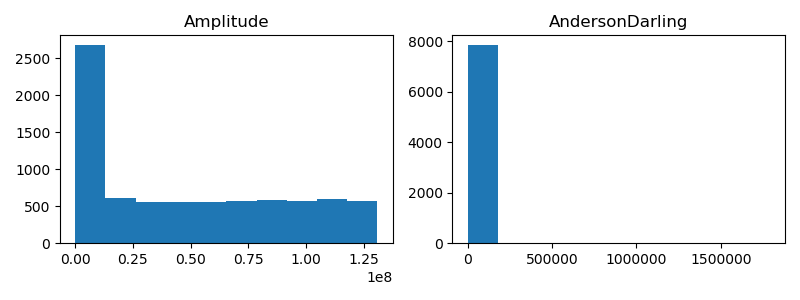

In [19]:
# create plot
fig, ax = plt.subplots( 1, (len(features_names)), tight_layout = True, figsize = (8, 3))

# iterate through each feature
for i, f in enumerate(range(0, len(features_names))):

    #add histogram of feature
    ax[i].hist(features_light_curves.iloc[:, f])
    
    # add title
    ax[i].set_title(features_names[f])

# Supervised classification logistic regressor

In [21]:
# Format data (separate in data and target)

# Get the independt variables
X = features_light_curves.loc[:, ["Amplitude", "AndersonDarling"]]

# Get the targets
y = features_light_curves.loc[:, ["target"]]

print(X.shape)
print(y.shape)

(7848, 2)
(7848, 1)


In [22]:
# Train LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# define model to train
logistic_regression = LogisticRegression(
#     max_iter = 10000, 
    multi_class = "auto", 
#     solver = "lbfgs", 
#     random_state=0
)

# train the model
logistic_regression.fit(X, y)

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# the more close to 1 is, the better the model fit the data
print("f1 Score: ", f1_score(y,logistic_regression.predict(X), average = "weighted"))

# get accuracy
print("accuracy: ", logistic_regression.score(X, y))

f1 Score:  0.1850560084226536
accuracy:  0.31995412844036697


# Predictions with LR

In [59]:
# write a value for the independent variable
# get data from the dataframe (to test if model is working well)
independent_variable_1 = 11.347079
independent_variable_2 = 0.999936

# define array of variables
variables = np.array([[independent_variable_1, independent_variable_2]])

# do the prediction
prediction = logistic_regression.predict(np.array(variables))

print("prediction: ", prediction[0])

prediction:  90.0


In real projects:
- You have to train the model splitting the data (using a group of the data to train the model and the other group to validate the model).
- You have to define different metrics based on the data and the project objetives. So in this case we are working with unbalanced clases (there are more classes than others, and that is a problem), so the more appropiate metric should be something that considerate it (probably F1 score is the best one).


# Dimensionality reduction PCA (Unsupervised learning)

In [60]:
# import library 
from sklearn.decomposition import PCA

# define number of latent variables
n_components = 2

# define PCA model
pca = PCA(n_components = n_components)

# get PCA 
principalComponents = pca.fit_transform(features_light_curves)

# converting to DF
pca_df = pd.DataFrame(
    data = principalComponents
)

# add object id
pca_df["object_id"] = features_light_curves["object_id"].values

# add target to DF
pca_df["target"] = features_light_curves["target"].values

# display dataframe
display(pca_df.head())
print("pca shape: ", pca_df.shape)

,0,1,object_id,target
0,-4.810313e+07,179.755788,615.0,92.0
1,-4.810303e+07,73.441409,713.0,88.0
2,-4.810302e+07,65.395620,730.0,42.0
3,-4.810300e+07,71.605960,745.0,90.0
4,-4.810262e+07,66.675882,1124.0,90.0


pca shape:  (7848, 4)


<IPython.core.display.Javascript object>


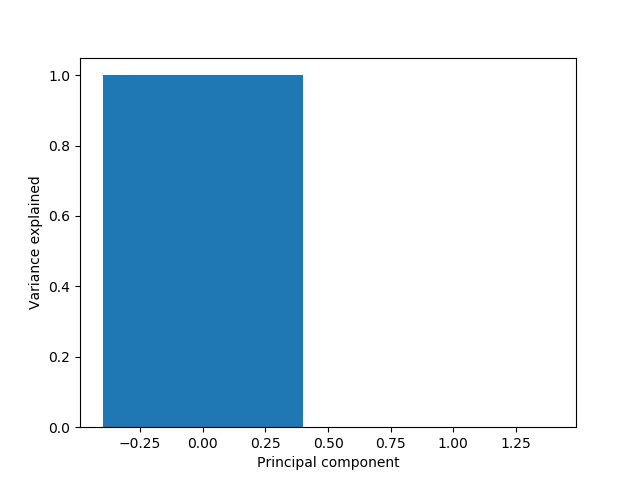

Text(0, 0.5, 'Variance explained')

In [61]:
# Plotting explained variance
fig, ax = plt.subplots()
ax.bar(np.arange(n_components), pca.explained_variance_ratio_)
ax.set_xlabel("Principal component")
ax.set_ylabel("Variance explained")

<IPython.core.display.Javascript object>


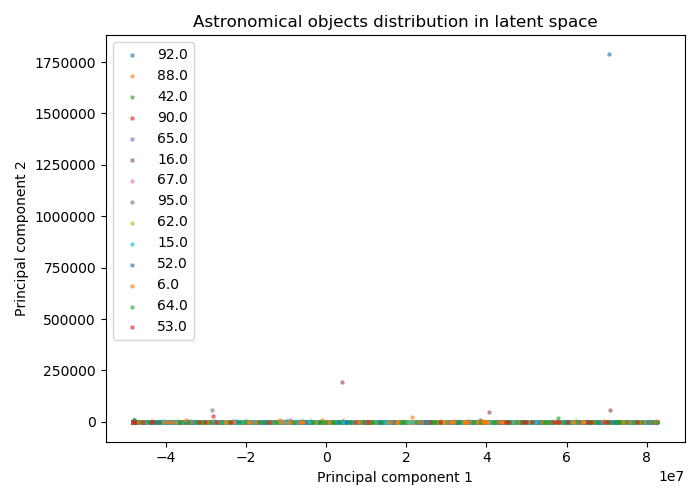

In [62]:
# plotting data projection with PCA
fig, ax  = plt.subplots(figsize = (7,5), tight_layout = True)

# iterate through each target
for label in pca_df.target.unique():
    
    # scatte plot (principal components)
    ax.scatter(pca_df.loc[pca_df.target == label, 0], pca_df.loc[pca_df.target == label, 1], s=5, alpha=0.5, cmap=plt.cm.tab10, label=str(label))
        
    # set titles
    ax.set_xlabel("Principal component 1")
    ax.set_ylabel("Principal component 2")
    ax.set_title("Astronomical objects distribution in latent space")
    
# add legend to plot
plt.legend()    

# Supervised classification with Logistic Regressor using PCA

In [72]:
# Train LR
from sklearn.linear_model import LogisticRegression

# define model to train
logistic_regression_PCA = LogisticRegression(
#     max_iter = 10000, 
    multi_class = "auto", 
#     solver = "lbfgs", 
#     random_state=0
)

# train the model
logistic_regression_PCA.fit(principalComponents, y)

/home/leo/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# the more close to 1 is, the better the model fit the data
print("f1 Score: ", f1_score(y,logistic_regression_PCA.predict(principalComponents), average = "weighted"))

# get accuracy
print("accuracy: ", logistic_regression_PCA.score(principalComponents, y))

f1 Score:  0.13320321161054563
accuracy:  0.21317533129459734


# Predictions with LR using PCA

In [75]:
# write a value for the independent variable
# get data from the dataframe (to test if model is working well)
independent_variable_1 = 11.347079
independent_variable_2 = 0.999936

# define array of variables
variables = np.array([[independent_variable_1, independent_variable_2]])

# do the prediction
prediction = logistic_regression_PCA.predict(np.array(variables))

print("prediction: ", prediction[0])

prediction:  15.0
